In [1]:
import sys
from pathlib import Path

In [2]:
module_path = Path.cwd().parent
if module_path not in sys.path:
    sys.path.append(str(module_path))

In [3]:
from src.tsp_problem import TSPProblem
from src.visualization import Visualizer


In [4]:
import pandas as pd

In [5]:
df_a = pd.read_csv("../data/TSPA.csv", sep=";", header=None, names=["x", "y", "cost"])
df_b = pd.read_csv("../data/TSPB.csv", sep=";", header=None, names=["x", "y", "cost"])


In [6]:
import numpy as np

In [7]:
def get_distance_matrix(A: np.array) -> np.array:
    p1 = np.sum(A**2, axis=1)[:, np.newaxis]
    p2 = np.sum(A**2, axis=1)
    p3 = -2 * np.dot(A, A.T)
    return np.array(np.sqrt(p1 + p2 + p3)).astype(int)

In [8]:
dist = get_distance_matrix(df_a[["x", "y"]].to_numpy())

In [9]:
dist

array([[   0, 1549,  636, ..., 2698, 2473, 1149],
       [1549,    0,  935, ..., 1887,  957,  453],
       [ 636,  935,    0, ..., 2179, 1840,  600],
       ...,
       [2698, 1887, 2179, ...,    0, 1599, 2190],
       [2473,  957, 1840, ..., 1599,    0, 1409],
       [1149,  453,  600, ..., 2190, 1409,    0]])

In [10]:
# problem = TSPProblem()
# distance_matrix = problem.run()

In [11]:
# np.all(distance_matrix.distance_matrix == dist)

In [12]:
problem = TSPProblem()

In [13]:
nodes = problem._get_nodes(problem.instances["TSPA"])

In [14]:
grades = problem.run()


Running TSPB instance
Running nearest method for 200 runs
Finished nearest method in 0.96s

Running TSPA instance
Running nearest method for 200 runs
Finished nearest method in 0.98s


In [15]:
for instance_name, instance_grades in grades.items():
    print(f"\n{instance_name}:")
    print("----")
    for method_name, grade in instance_grades.items():
        print(f"{method_name}: {grade}")


TSPB:
----
nearest: 
==================================== Grade =====================================
Method:                                 nearest
Best run id:                            114
Best run cost:                          48264
Best run distance:                      29238
Best run score:                         77502
Min score:                              77502
Avg score:                              79215
Max score:                              82588


TSPA:
----
nearest: 
==================================== Grade =====================================
Method:                                 nearest
Best run id:                            1
Best run cost:                          51792
Best run distance:                      32634
Best run score:                         84426
Min score:                              84426
Avg score:                              87625
Max score:                              94961



In [18]:
visualizer = Visualizer()

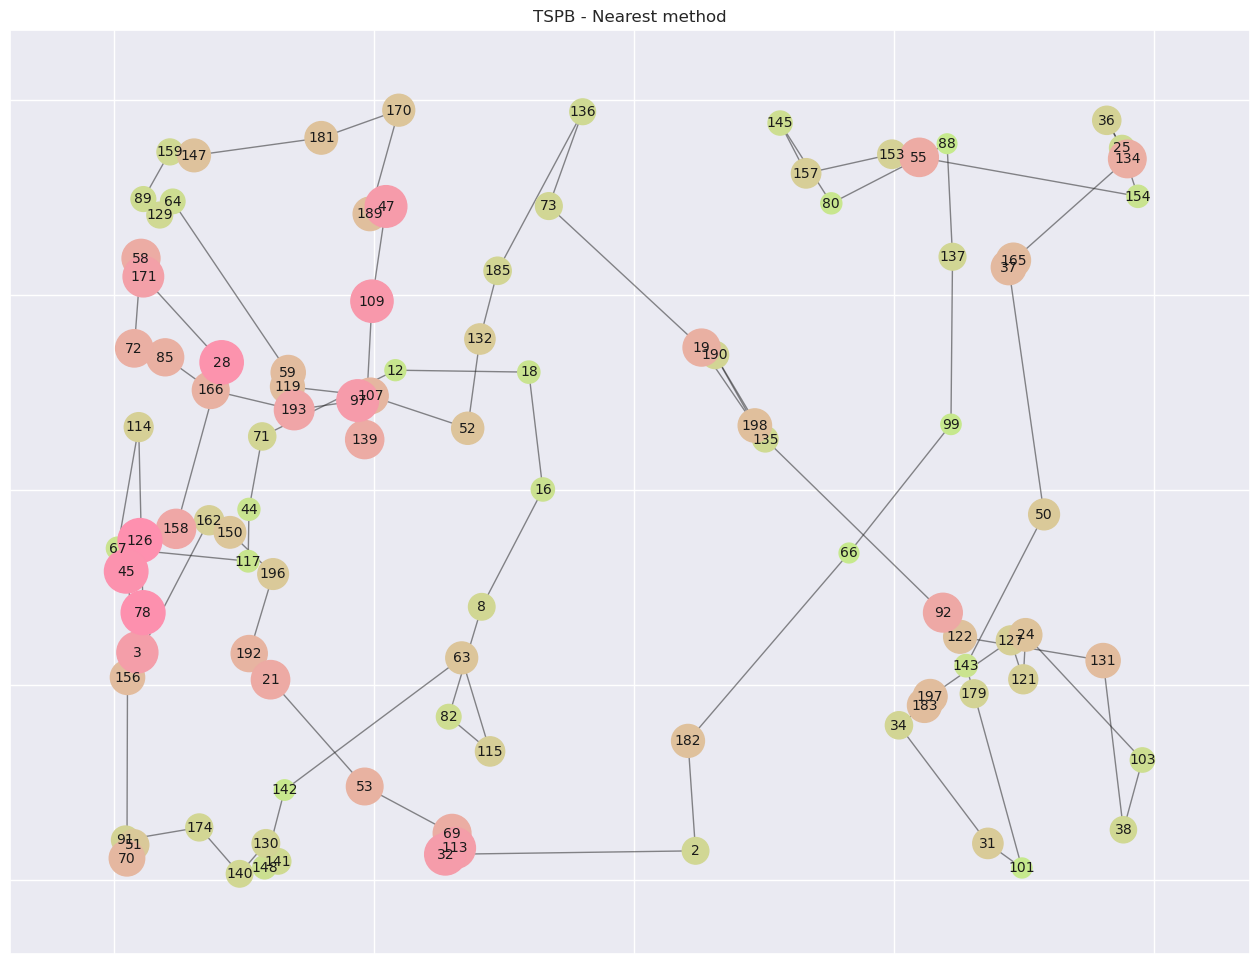

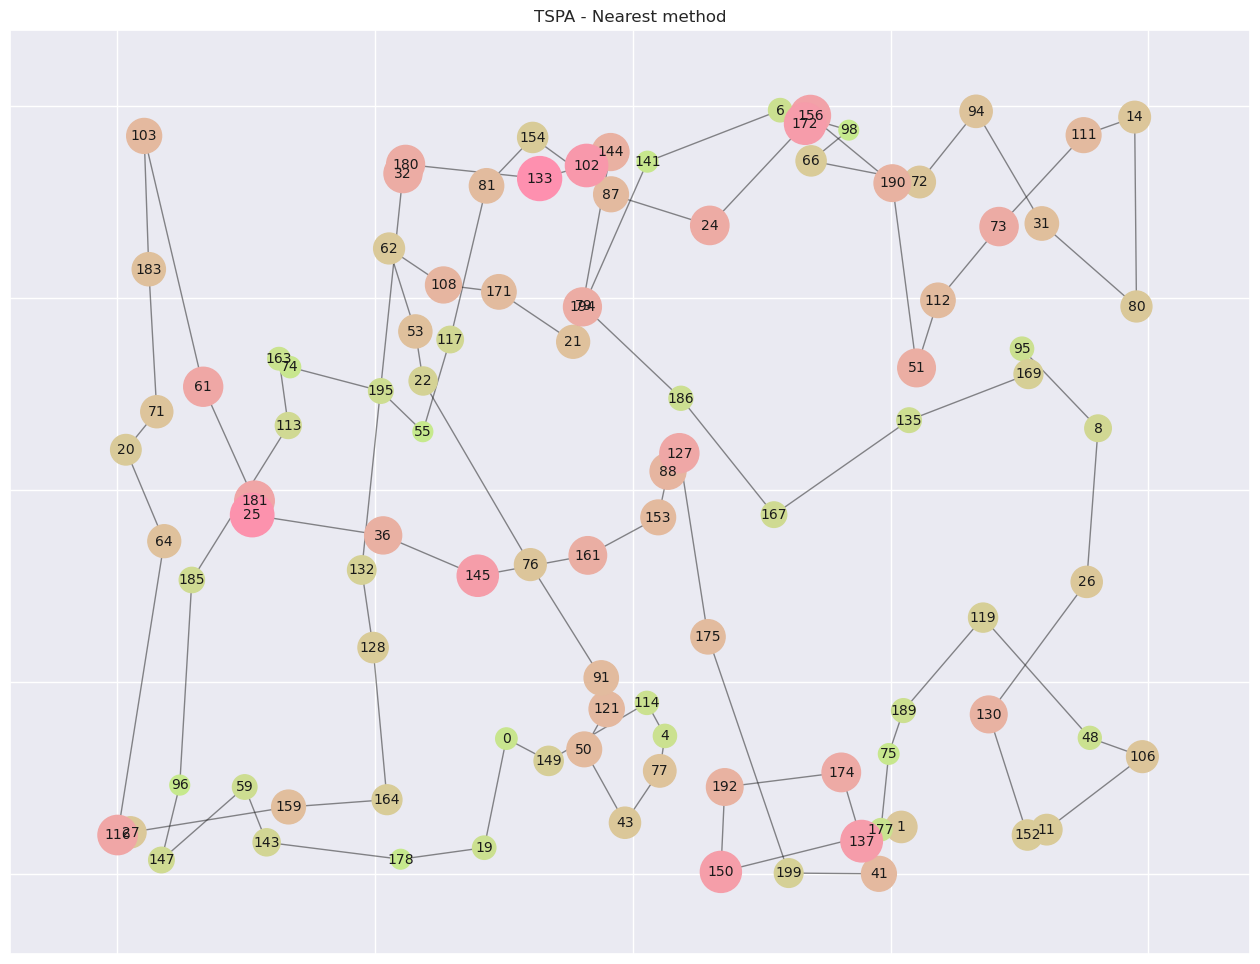

In [19]:
for instance_name, instance_grades in grades.items():
    for method_name, grade in instance_grades.items():
        visualizer.visualise_solution(grade, instance_name, method_name)